In [1]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 24: Hypothesis Testing Errors & Power

Throughout this block, we have been studying hypothesis tests. We have covered the four basic steps of any hypothesis test, and we have practiced various methods for obtaining the distribution of our test statistic under the null hypothesis. 

After we have reached a conclusion (reject or fail to reject), we must consider possible errors. 

### Type I error 

Type I error is the event that we rejected the null hypothesis when the null hypothesis was actually true. Type I error is also known as a false positive. The probability of a Type I error is usually defined by the threshold used for rejection. A common threshold is 0.05. Those of you who have taken statistics before may recognize this value as $\alpha$. 

### Type II error

Type II error is the event that we failed to reject the null hypothesis when the null hypothesis was actually false. This is otherwise known as a false negative. The probability of a Type II error is harder to find and requires a more in-depth analysis of a hypothesis test. The probability of a Type II error is often given as $\beta$, and $1-\beta$ is referred to as **Power**. The power of a test is probability that we will reject the null hypothesis when we are supposed to. 

Which one of these errors is more serious? It depends on the context of the problem. 

### Example: Golf Balls

Joe has a summer job at a golf course and one of his jobs is to fish out golf balls from the water traps. He has a theory that certain types of golf ball are more likely to end up in the water than others. Let's assume there are four brands of golf ball, let's and assume that all four are used equally at this golf course. He fishes out 100 golf balls and counts each brand. He finds 30 of brand A, 30 of brand B, 20 of brand C and 20 of brand D. Conduct a hypothesis test to determine whether certain types of golf ball are more likely than others to end up in the water.

Step 1: Hypotheses

*The null hypothesis states that no type of golf ball is more likely to end up in the water, and the unequal distribution Joe observes is due purely to chance. The alternative hypothesis states that the distribution Joe observed is not purely due to chance.*

Step 2: Test statistic

There are many correct answers, but let's go with sum of absolute difference between observed and expected counts under $H_0$. To do this, we need to find the expected counts. If each ball was equally likely, how many should we expected to find of each if we select 100 golf balls? 

*If each ball is equally likely to end up in the water, then the number of each type per 100 balls in the water will have an expectation value of 25. Thus, the observed statistic is*

In [13]:
obs = np.sum(abs(make_array([30, 30, 20, 20])-25))
obs

20

Step 3: $p$-value

We need the distribution of the test statistic under $H_0$. 

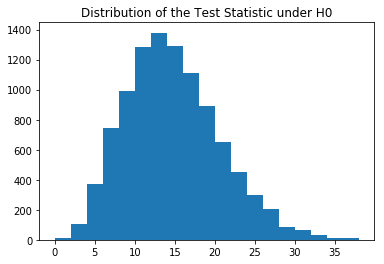

In [80]:
types = make_array('A', 'B', 'C', 'D')
dist = make_array()

for _ in np.arange(10000):
    sample = np.random.choice(types,100) # Get a sample of 100 random choices from 'types'
    sum = abs(np.sum(make_array( sample=='A', sample=='B', sample=='C', sample=='D'), 1)-25).sum()
        # Gets the test statistic of the sample
    dist = np.append(dist, sum) # record the statistic for this sample

plt.hist(dist,np.arange(0,40,2));
plt.title('Distribution of the Test Statistic under H0');

In [84]:
p = np.sum(dist>=obs)/len(dist)
p

0.1818

Step 4: Conclude

*Since the p-value of the observed value of the test statistic is 0.18, which is much greater then 0.05, we conclude that the data support the null hypothesis.*

What kind of error could we have made in this case? 

*We could have made a Type II, or false negative, since we rejected the alternate hypothesis.*

#### Power 
Suppose that, in truth, 30% of the balls found in the water were brand A, 30% were brand B, 20% were brand C and 20% were brand D. In this case, our collected sample reflected this truth perfectly. However, our hypothesis test failed to recognize this deviation from equal proportions. We made a type II error. This is because this test has fairly low power. Use simulation to determine the power of this test. 

I am looking for the probability that I reject the null hypothesis given the true proportions laid out above. Well, first I need to figure out for what values of my test statistic I would reject $H_0$. 

In [96]:
percentile([5, 95], dist) # Get 5th & 95th percentiles

# Check by computing p-values
np.sum(dist<=4)/len(dist)
np.sum(dist>=26)/len(dist)

array([ 6., 24.])

0.0486

0.0416

*Since the 4 and 26 are the least extreme values of the test statistic with a p-value less than 0.05, I would have rejected any observed value of 4 or less or of 26 or greater on the basis of having a p-value below 0.05.*

Next, I need to simulate from the true population and determine how often my test statistic would have met this threshold. 

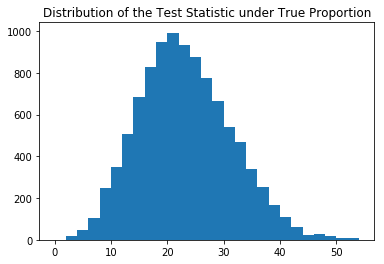

In [110]:
dist2 = make_array()

# Using same method as before, get a bunch of test statistics
for _ in np.arange(10000):
    sample = np.random.choice(types,100, p=[0.3,0.3,0.2,0.2]) # NOTICE new proportions of balls
    sum = abs(np.sum(make_array( sample=='A', sample=='B', sample=='C', sample=='D'), 1)-25).sum()
        # Gets the test statistic of the sample
    dist2 = np.append(dist2, sum) # record the statistic for this sample
    
plt.hist(dist2,np.arange(0,56,2));
plt.title('Distribution of the Test Statistic under True Proportion');

In [122]:
(np.sum(dist2<=4)+np.sum(dist2>=26))/len(dist2)
    # Proportion of test statistics that would have been rejected, as appropriate

0.3529

What do you think about this power? 

*A power of 35.3% is not insignificant, but it is very small. In other words, it was not impossible for us to get data leading to rejection of the null hypothesis, but it was unlikely.*

Repeat this power calculation, but assume Joe collects 500 balls instead of 100. Note that you will have to obtain a new critical value. What does this tell you about power and sample size?

In [147]:
# Recalculate null hypothesis distribution for 500 samples

ex = 500/4 # need a new expected value
newObs = np.sum(abs(make_array([0.3*500, 0.3*500, 0.2*500, 0.2*500])-ex))
    # new observed value, assuming proportion of observed balls stays the same
dist3 = make_array()

for _ in np.arange(100000):
    sample = np.random.choice(types,500) # Get a sample of 500 random choices from 'types'
    sum = abs(np.sum(make_array( sample=='A', sample=='B', sample=='C', sample=='D'), 1)-ex).sum()
        # Gets the test statistic of the sample
    dist3 = np.append(dist3, sum) # record the statistic for this sample

p = np.sum(dist3>=newObs)/len(dist3); # check out the p-score, just for fun
p

3e-05

In [149]:
percentile([5, 95], dist3) # Get 5th & 95th percentiles

# Check by computing p-values
np.sum(dist3<=10)/len(dist3)
np.sum(dist3>=56)/len(dist3)

array([12., 54.])

0.04525

0.04893

In [150]:
# Get the distribution of test statistics under the true proportion again
dist4 = make_array()

# Using same method as before, get a bunch of test statistics
for _ in np.arange(10000):
    sample = np.random.choice(types,500, p=[0.3,0.3,0.2,0.2]) # NOTICE new proportions of balls
    sum = abs(np.sum(make_array( sample=='A', sample=='B', sample=='C', sample=='D'), 1)-ex).sum()
        # Gets the test statistic of the sample
    dist4 = np.append(dist4, sum) # record the statistic for this sample
    
(np.sum(dist4<=10)+np.sum(dist4>=56))/len(dist4)
     # get power by comparing distribution to cutoff values for the statistic under the null hypothesis

0.9804

*Recalculating with the same proportions, but a larger sample size, increses the power to a whopping 98%! It appears that a larger sample size is correlated to a greater power.*